In [4]:
!pip install arch

In [32]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import arch
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tools import sm_exceptions as se
from datetime import datetime, timedelta

import warnings

warnings.filterwarnings('ignore', category = se.ValueWarning)
warnings.filterwarnings('ignore', category = se.HessianInversionWarning)
warnings.filterwarnings('ignore', category = se.ConvergenceWarning)

In [6]:
def get_asset_history(asset, start_date, end_date, interval):
  ticker = yf.Ticker(asset)
  history = ticker.history(start = start_date, end = end_date, interval = interval)
  return history

In [7]:
def extract_4h_history(df):
  return df[df.index.hour % 4 == 0]

In [8]:
cryptos = ["BTC-USD", "ETH-USD"]

start_date = "2023-11-01"
end_date = "2024-11-01"


In [9]:
data = {}
for crypto in cryptos:
  history = get_asset_history(crypto, start_date = start_date, end_date = end_date, interval = "1h")
  data[crypto] = extract_4h_history(history)

In [65]:
import numpy as np

In [103]:
for crypto in cryptos:
  data[crypto]["return"] = 100 * data[crypto]["Close"].pct_change()
  first_diffs = data[crypto].Close.values[1:] - data[crypto].Close.values[:-1]
  first_diffs = np.concatenate([first_diffs, [0]])
  data[crypto]["first_difference"] = first_diffs

<ipython-input-103-cd8053fb4ca4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[crypto]["return"] = 100 * data[crypto]["Close"].pct_change()
<ipython-input-103-cd8053fb4ca4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[crypto]["first_difference"] = first_diffs


In [104]:
data["BTC-USD"]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,return,first_difference
Datetime,,,,,,,,,
2023-11-01 00:00:00+00:00,34657.273438,34666.660156,34524.503906,34526.164062,0,0.0,0.0,NaN,-88.230469
2023-11-01 04:00:00+00:00,34443.531250,34478.128906,34407.695312,34437.933594,177147904,0.0,0.0,-0.255547,11.332031
2023-11-01 08:00:00+00:00,34456.097656,34480.570312,34427.046875,34449.265625,0,0.0,0.0,0.032906,360.390625
2023-11-01 12:00:00+00:00,34431.949219,34852.726562,34355.218750,34809.656250,654773248,0.0,0.0,1.046149,-337.562500
2023-11-01 16:00:00+00:00,34296.863281,34540.000000,34294.628906,34472.093750,127811584,0.0,0.0,-0.969738,897.222656
...,...,...,...,...,...,...,...,...,...
2024-10-31 04:00:00+00:00,72316.062500,72340.195312,72226.929688,72251.359375,0,0.0,0.0,0.183638,6.187500
2024-10-31 08:00:00+00:00,72404.976562,72445.648438,72145.484375,72257.546875,0,0.0,0.0,0.008564,-196.250000
2024-10-31 12:00:00+00:00,72202.757812,72231.500000,72009.398438,72061.296875,0,0.0,0.0,-0.271598,-1712.921875


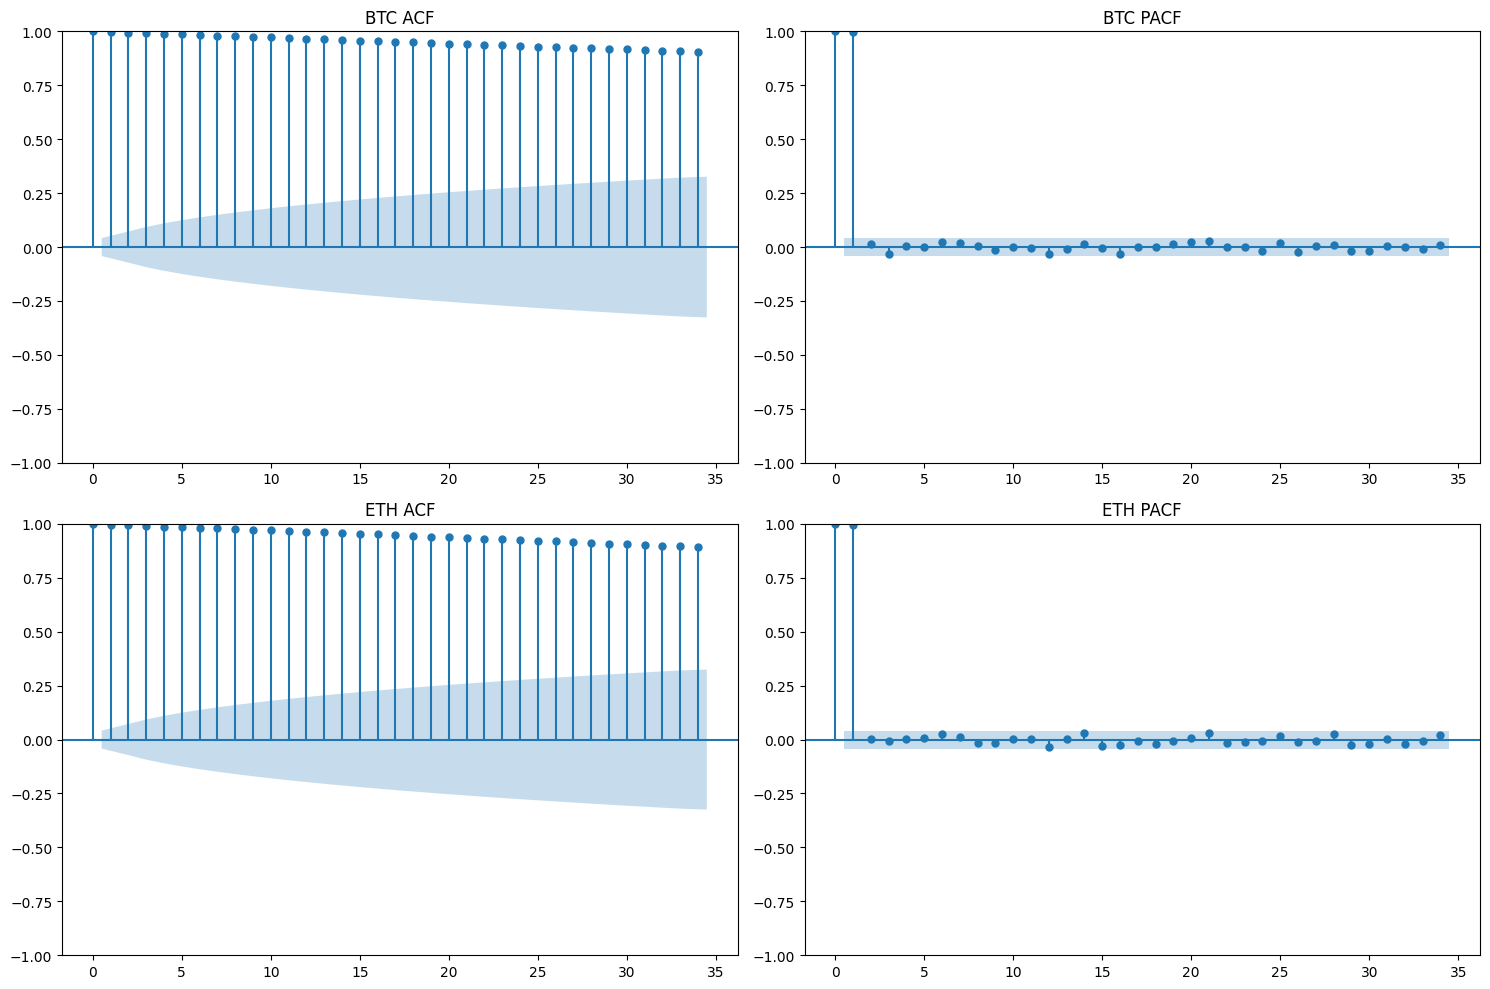

In [105]:
fig, axes = plt.subplots(2, 2, figsize = (15, 10))

plot_acf(data["BTC-USD"]["Close"], ax = axes[0, 0], title = "BTC ACF")
plot_pacf(data["BTC-USD"]["Close"], ax = axes[0, 1], title = "BTC PACF")

plot_acf(data["ETH-USD"]["Close"], ax = axes[1, 0], title = "ETH ACF")
plot_pacf(data["ETH-USD"]["Close"], ax = axes[1, 1], title = "ETH PACF")

fig.tight_layout()
fig.show()

In [106]:
from statsmodels.tsa.stattools import arma_order_select_ic

result = arma_order_select_ic(data["BTC-USD"]["return"], ic = ["aic", "bic"], trend = "n", max_ar = 5, max_ma = 5)

p, q = result.aic_min_order

print("===============================================")
print(f"Calculated values for p, q: ({p}, {q})")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Calculated values for p, q: (2, 4)


In [120]:
train_set = data["BTC-USD"][:"2024-09-01"]["Close"]
test_set = data["BTC-USD"]["2024-09-01":"2024-10-01"]["Close"]
validation_set = data["BTC-USD"]["2024-10-01":]["Close"]

In [115]:
arma_model = ARIMA(train_set, order = (p, 0, q)).fit()
print(arma_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1836
Model:                 ARIMA(2, 0, 4)   Log Likelihood              -14519.243
Date:                Mon, 16 Dec 2024   AIC                          29054.486
Time:                        16:57:30   BIC                          29098.609
Sample:                    11-01-2023   HQIC                         29070.757
                         - 09-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.592e+04   5784.256      9.667      0.000    4.46e+04    6.73e+04
ar.L1          1.3676      0.701      1.951      0.051      -0.006       2.742
ar.L2         -0.3686      0.700     -0.527      0.5

In [121]:
predictions_rolling = pd.Series()
for end_date in test_set.index:
    train_data = data["BTC-USD"]["Close"][:end_date - timedelta(days=1)]
    model = ARIMA(train_data, order=(p, 0, q))
    model_fit = model.fit()
    pred = model_fit.predict(end_date)
    predictions_rolling.loc[end_date] = pred.loc[end_date]

In [122]:
predictions_rolling

,0
2024-09-01 00:00:00+00:00,59222.855893
2024-09-01 04:00:00+00:00,59300.727811
2024-09-01 08:00:00+00:00,58977.375822
2024-09-01 12:00:00+00:00,59163.288939
2024-09-01 16:00:00+00:00,58935.215768
...,...
2024-10-01 04:00:00+00:00,64425.826555
2024-10-01 08:00:00+00:00,64274.811634
2024-10-01 12:00:00+00:00,64039.682735
2024-10-01 16:00:00+00:00,63486.645132


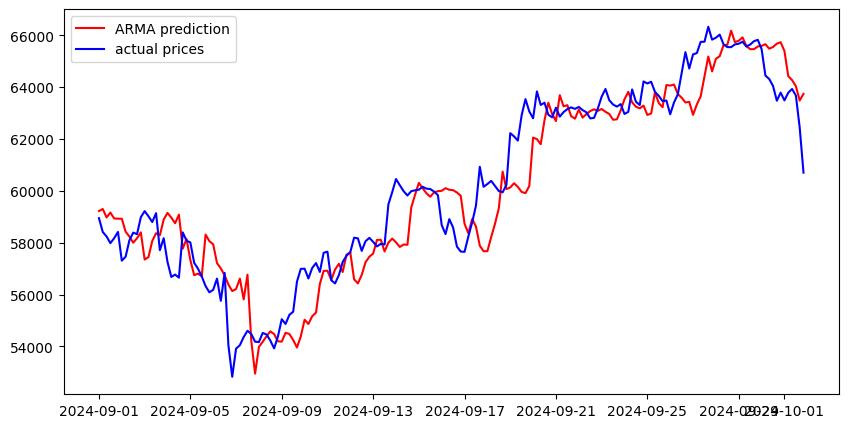

In [124]:
plt.figure(figsize = (10, 5))
plt.plot(predictions_rolling, color = "r", label = "ARMA prediction")
plt.plot(test_set, color = "b", label = "actual prices")
plt.legend()
plt.show()

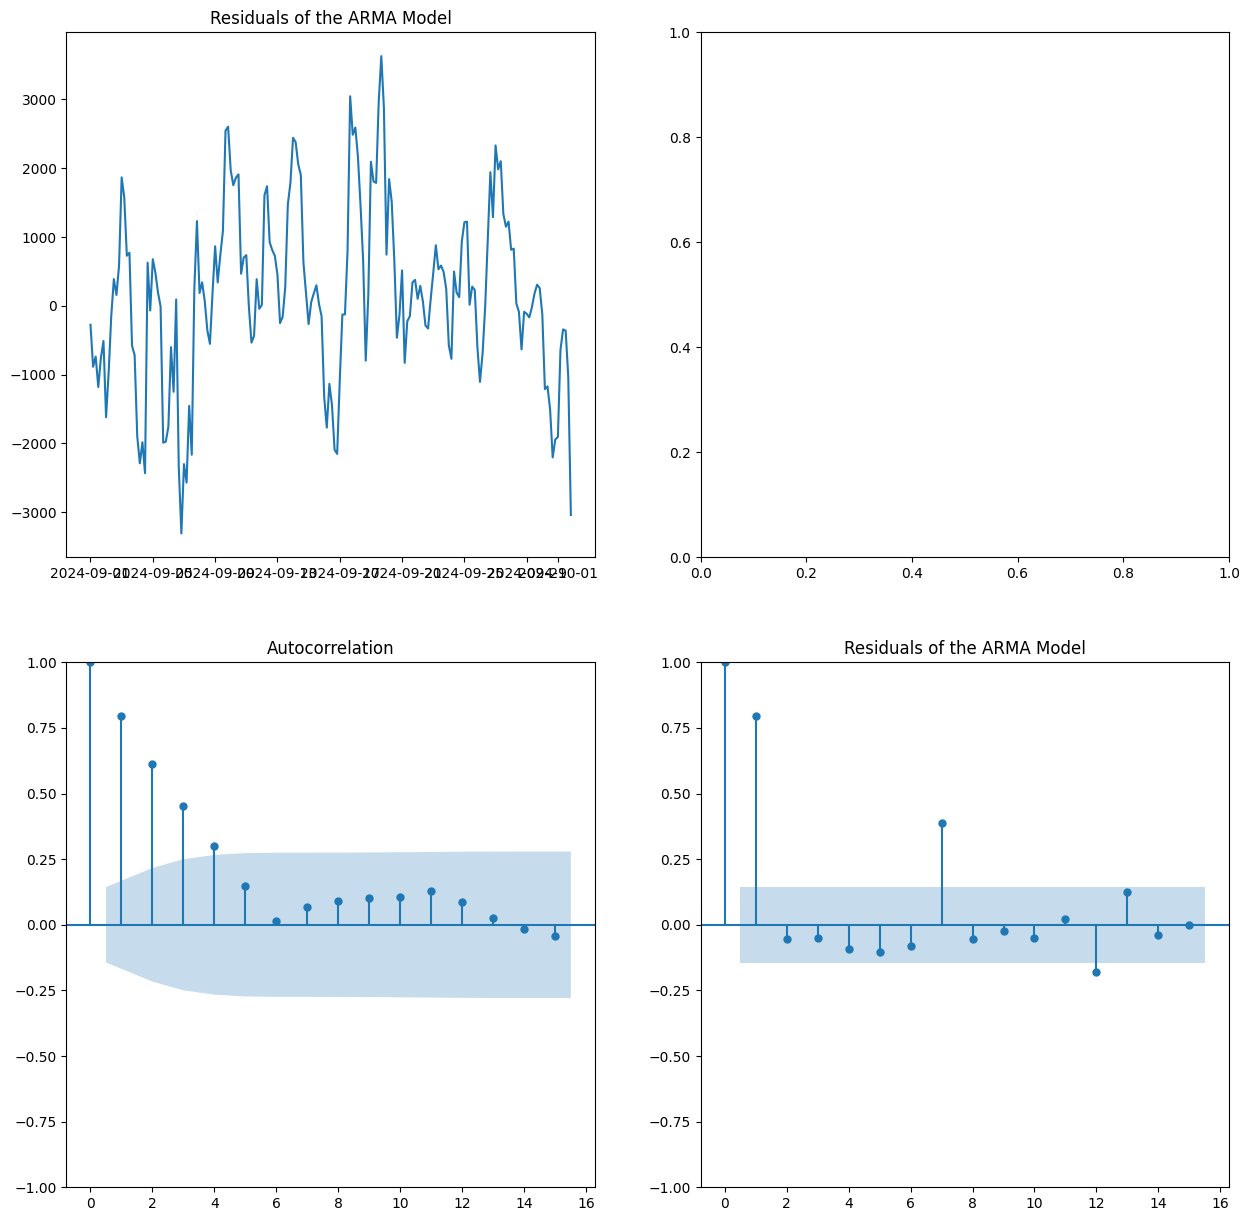

In [126]:
residuals = test_set - predictions_rolling

fig, axes = plt.subplots(2, 2, figsize = (15, 15))

axes[0, 0].plot(residuals)
axes[0, 0].set_title('Residuals of the ARMA Model')
plot_acf(residuals, lags = 15, ax = axes[1, 0])
plot_pacf(residuals, lags = 15, ax = axes[1, 1])

plt.title('Residuals of the ARMA Model')
plt.show()

In [128]:
from sklearn.preprocessing import StandardScaler

In [141]:
def get_arch_volatility(df, p, q):
    scaler = StandardScaler()
    scaled_y = scaler.fit_transform(df.dropna().values.reshape(-1, 1)).flatten()

    arch_model = arch.arch_model(scaled_y, vol = 'arch', q = q)
    arch_fit = arch_model.fit(disp = 'off')
    arch_volatility_forecast = arch_fit.conditional_volatility

    return arch_volatility_forecast

In [137]:
def get_garch_volatility(df, p, q):
    scaler = StandardScaler()
    scaled_y = scaler.fit_transform(df.dropna().values.reshape(-1, 1)).flatten()

    garch_model = arch.arch_model(scaled_y, vol = 'garch', q = q)
    garch_fit = garch_model.fit(disp = 'off')
    garch_volatility_forecast = garch_fit.conditional_volatility

    return garch_volatility_forecast

In [143]:
garch_volatility_forecast = get_garch_volatility(residuals, p, q)
arch_volatility_forecast = get_arch_volatility(residuals, p, q)

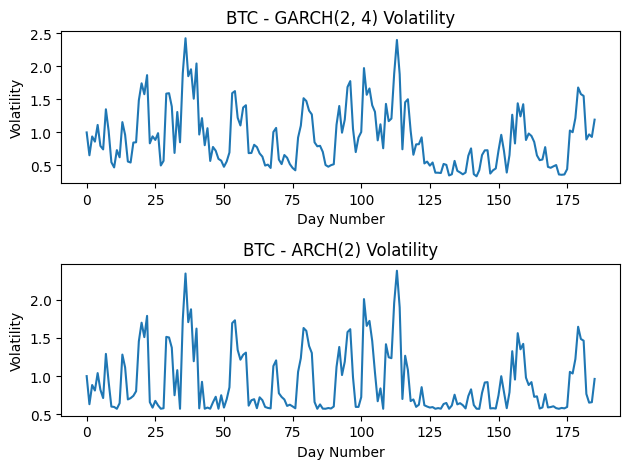

In [144]:
fig, axes = plt.subplots(2, 1)
axes[0].plot(garch_volatility_forecast, label=f'BTC GARCH({p}, {q}) Volatility')
axes[0].set_title(f'BTC - GARCH({p}, {q}) Volatility')
axes[0].set_xlabel('Day Number')
axes[0].set_ylabel('Volatility')

axes[1].plot(arch_volatility_forecast, label=f'BTC ARCH({p}) Volatility')
axes[1].set_title(f'BTC - ARCH({p}) Volatility')
axes[1].set_xlabel('Day Number')
axes[1].set_ylabel('Volatility')

plt.tight_layout()
plt.show()
